In [ ]:

#    Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/
#    Реализовать самостоятельно логистическую регрессию
#        Обучить ее методом градиентного спуска
#        Методом nesterov momentum
#        Методом rmsprop
#    В качестве dataset'а взять Iris, оставив 2 класса:
#        Iris Versicolor
#        Iris Virginica



In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Обычная линейная регрессия

In [31]:
N = 100
X = np.random.uniform(low=0, high=100, size=(N,2))
Y = 1 + 0.3*X[:,0] + 1.5*X[:,1] +  np.random.normal(scale=5, size=N)

In [124]:
def lin_reg(X,y, alpha=0.000001, era=1000000, eps=0.0000001):
    j = 0
    m = len(X[0])+1
    teta_old = np.zeros(m)
    teta = np.ones(m)
    while (np.sum(np.abs(teta-teta_old) > eps)>0) and (era > j):
        teta_old = teta.copy()
        teta[0] = teta_old[0] + alpha * np.sum(y - (np.dot(teta_old[1:],X.T)+teta_old[0]))/len(y)
        teta[1:] = teta_old[1:] + alpha*np.sum(X*(y-(np.dot(teta_old[1:],X.T)+teta_old[0])).reshape(len(y),1), axis=0)/len(y)
        if(j%50000 == 0):
            print(j, teta)
        j+=1 
    print('Количество эпох:',j-1)    
    return teta


In [35]:
teta = lin_reg(X,Y)
print('Результат:', teta)

0 [-6.51579210e-06 -8.71005319e-04  6.25744364e-05]
10503
Результат: [0.99864886 0.30673969 1.49679383]


In [ ]:
# как можно видеть получившиеся коэффициенты отличаются от задааных не более, чем на доли процента  

In [75]:
#  Логистическая регрессия с обучением обычным градиентным спуском

In [9]:
from sklearn.datasets import load_iris
data_all = load_iris()
data_X = data_all['data']
data_y = data_all['target']
data_all['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
X_all = np.hstack((data_X, data_y.reshape(150,1)))


In [61]:
# фильтруем класс setosa
X_y = X_all[X_all[:,-1] != 0]


In [148]:
X = X_y[:,:-1]
y = X_y[:,-1]-1


from sklearn.model_selection import train_test_split 

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [149]:
y_test

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.])

In [176]:
def log_reg(X,y, alpha=0.005, era=1000000, eps=0.0000001):
    '''
       получаем коэффициенты для регрессии
    '''
    j = 0
    m = len(X[0])+1
    teta_old = np.zeros(m)
    teta = np.ones(m)
    while (np.sum(np.abs(teta-teta_old) > eps)>0) and (era > j):
        teta_old = teta.copy()
        teta[0] = teta_old[0] + alpha*np.sum(y-(1/(1+np.exp(-(np.dot(teta_old[1:],X.T)+teta_old[0])))))/len(y)
        teta[1:] = teta_old[1:] + alpha*np.sum(X*((y-1/(1+np.exp(-(np.dot(teta_old[1:],X.T)+teta_old[0])))).reshape(len(y),1)), axis=0)/len(y)
        if(j%50000 == 0):
            print(j,teta)
        j+=1 
    print('Количество эпох:',j-1)     
    return teta

def get_pred(y, level = 0.5):
    '''
       переводим получившиеся коэффициенты в метки классов по уровню отсечения
    '''
    return np.floor(y+1-level)
    

In [177]:
teta = log_reg(X, y)
y_p_1 = 1/(1+np.exp(-(np.sum(X*teta[1:],axis=1)+teta[0])))
y_c_1 = get_pred(y_p_1)

0 [0.9975     0.98516001 0.993075   0.98935001 0.996685  ]
50000 [-1.87045906 -3.25285823 -3.03253649  4.55626093  5.15813779]
100000 [-3.10070432 -3.7239182  -3.78182174  5.39592671  6.4558262 ]
150000 [-4.08175549 -3.95752842 -4.18325618  5.84619961  7.26643342]
200000 [-4.93070165 -4.09277377 -4.43975416  6.13792177  7.84935044]
250000 [-5.69130058 -4.17370568 -4.61852235  6.34311401  8.29882247]
300000 [-6.38598397 -4.2204993  -4.74968255  6.49385864  8.66088055]
350000 [-7.02834705 -4.24426738 -4.84913187  6.60740547  8.96161362]
400000 [-7.62753499 -4.25183692 -4.92621647  6.69419453  9.21722682]
450000 [-8.19014397 -4.24771199 -4.98687458  6.76107488  9.43844285]
500000 [-8.72116937 -4.2350161  -5.03510525  6.812805    9.63269855]
550000 [-9.22453022 -4.21599587 -5.07372476  6.85283231  9.80534572]
600000 [-9.70338319 -4.19231217 -5.10478718  6.88373344  9.96035315]
650000 [-10.16032306  -4.16521863  -5.1298329    6.90747961  10.10073879]
700000 [-10.59751725  -4.13567656  -5.15

In [178]:
y_c_1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [179]:
from sklearn.metrics import roc_auc_score

In [180]:
print('roc_auc:',roc_auc_score(y,y_c_1))

roc_auc: 0.9699999999999999


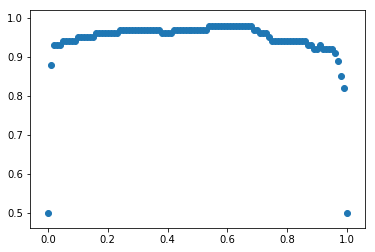

In [181]:
# смещая границу отсечения по классам от 0 до 1 можно увидеть насколько уверенно модель разделила классы  
plt.scatter(np.array([0.01*l for l in range(101)]), np.array([roc_auc_score(y,get_pred(y_p_1,0.01*l)) for l in range(101)]))

In [156]:
# как видно из результатов модель сошлась не доконца (отсеклось по количеству эпох) 

In [157]:
# теперь проверим для тестовой выборке

In [182]:
teta = log_reg(X_train, y_train)
y_p_1t = 1/(1+np.exp(-(np.sum(X_test*teta[1:],axis=1)+teta[0])))
y_c_1t = get_pred(y_p_1t)
print('roc_auc:',roc_auc_score(y_test,y_c_1t))

0 [0.99757143 0.98542858 0.99320715 0.98951429 0.99668572]
50000 [-2.2389957  -2.90470117 -3.59439829  4.60485629  4.79493488]
100000 [-3.75587862 -3.2149133  -4.49688119  5.38983792  6.04595247]
150000 [-4.97734709 -3.33794822 -4.95972396  5.78317547  6.83112671]
200000 [-6.03695663 -3.38502326 -5.24181343  6.01702854  7.40134687]
250000 [-6.98604403 -3.39046082 -5.43149867  6.16471974  7.84946881]
300000 [-7.85147129 -3.37062592 -5.56816077  6.25976183  8.22064852]
350000 [-8.64980621 -3.33501356 -5.67209091  6.32062197  8.5400939 ]
400000 [-9.39235816 -3.28968199 -5.75481074  6.35864091  8.82312953]
450000 [-10.08738414  -3.23868583  -5.82334161   6.38125755   9.07963262]
500000 [-10.74120334  -3.18480174  -5.8821944    6.39355253   9.31624708]
550000 [-11.3588221   -3.1299455   -5.9343833    6.39907961   9.53758957]
600000 [-11.9443126   -3.07543284  -5.98198083   6.40035536   9.74695077]
650000 [-12.50105654  -3.02215251  -6.02644052   6.39916833   9.94672463]
700000 [-13.03190935

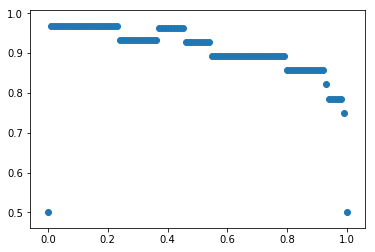

In [183]:
plt.scatter(np.array([0.01*l for l in range(101)]), np.array([roc_auc_score(y_test,get_pred(y_p_1t,0.01*l)) for l in range(101)]))

In [160]:
#  Логистическая регрессия с обучением Nesterov Accelerated Gradient

In [184]:
def log_reg_nest(X,y, alpha=0.005, era=1000000, eps=0.0000001, gamma=0.9):
    '''
       получаем коэффициенты для регрессии
    '''
    j = 0
    m = len(X[0])+1
    vt = np.zeros(m)
    teta_old = np.zeros(m)
    teta = np.ones(m)
    while (np.sum(np.abs(teta-teta_old) > eps)>0) and (era > j):
        teta_old = teta.copy()
        gr =y-(1/(1+np.exp(-(np.dot((teta_old[1:]-gamma*vt[1:]),X.T)+(teta_old[0]-gamma*vt[0])))))
        vt[0]= gamma*vt[0]+(1-gamma)*alpha*np.sum(gr)/len(y)
        teta[0] = teta_old[0] + vt[0]
        vt[1:] = gamma*vt[1:]+(1-gamma)*alpha*np.sum(X*(gr.reshape(len(y),1)), axis=0)/len(y)
        teta[1:] = teta_old[1:] + vt[1:]
        if(j%50000 == 0):
            print(j,teta)
        j+=1 
    print('Количество эпох:',j-1) 
    return teta

In [185]:
teta = log_reg_nest(X, y)
y_p_2 = 1/(1+np.exp(-(np.sum(X*teta[1:],axis=1)+teta[0])))
y_c_2 = get_pred(y_p_2)

0 [0.99975   0.998516  0.9993075 0.998935  0.9996685]
50000 [-1.8705405  -3.25338819 -3.03291388  4.55698123  5.15869081]
100000 [-3.10073624 -3.7242621  -3.78211633  5.3964006   6.45623665]
150000 [-4.08176793 -3.95778515 -4.18349487  5.84655216  7.26676793]
200000 [-4.9307063  -4.09297825 -4.43995332  6.13820081  7.84963392]
250000 [-5.69130279 -4.17387437 -4.61869212  6.34334305  8.29906777]
300000 [-6.38598641 -4.22064145 -4.74982951  6.49405108  8.66109564]
350000 [-7.02835107 -4.2443888  -4.84926052  6.6075697   8.96180402]
400000 [-7.62754124 -4.25194158 -4.92633     6.69433621  9.2173966 ]
450000 [-8.19015274 -4.24780277 -4.9869754   6.76119805  9.43859516]
500000 [-8.72118076 -4.23509517 -5.0351952   6.81291264  9.63283586]
550000 [-9.22454418 -4.21606493 -5.0738053   6.85292675  9.80547002]
600000 [-9.70339964 -4.19237257 -5.10485949  6.88381651  9.96046608]
650000 [-10.16034186  -4.16527151  -5.12989797   6.90755283  10.10084172]
700000 [-10.59753825  -4.13572285  -5.150102 

In [186]:
roc_auc_score(y,y_c_2)

0.9699999999999999

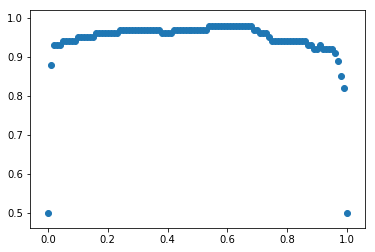

In [187]:
plt.scatter(np.array([0.01*l for l in range(101)]), np.array([roc_auc_score(y,get_pred(y_p_2,0.01*l)) for l in range(101)]))

In [ ]:
#  вторая модель сошлась так же не доконца (отсеклось по количеству эпох)
#  и коэффициенты похожи на коэффициенты первой модели

In [ ]:
# теперь проверим для тестовой выборке

In [188]:
teta = log_reg_nest(X_train, y_train)
y_p_2t = 1/(1+np.exp(-(np.sum(X_test*teta[1:],axis=1)+teta[0])))
y_c_2t = get_pred(y_p)
print('roc_auc:',roc_auc_score(y_test,y_c_2t))

0 [0.99975714 0.99854286 0.99932071 0.99895143 0.99966857]
50000 [-2.23902241 -2.90517312 -3.5949015   4.60559646  4.79538167]
100000 [-3.75587419 -3.21520407 -4.49726618  5.39030869  6.04629787]
150000 [-4.97733783 -3.33816073 -4.96002024  5.78351511  6.83141262]
200000 [-6.03695209 -3.38518894 -5.24204708  6.01728859  7.40158887]
250000 [-6.98604766 -3.39059338 -5.43168712  6.16492523  7.84967602]
300000 [-7.85148406 -3.37073303 -5.56831547  6.25992708  8.22082746]
350000 [-8.64982798 -3.33510029 -5.67221964  6.32075616  8.54024961]
400000 [-9.39238834 -3.28975208 -5.75491894  6.35875045  8.82326602]
450000 [-10.08742192  -3.23874218  -5.82343327   6.38134717   9.07975314]
500000 [-10.7412479   -3.18484673  -5.88227253   6.39362591   9.31635427]
550000 [-11.3588726   -3.12998107  -5.93445025   6.39913966   9.53768562]
600000 [-11.94436826  -3.0754606   -5.98203849   6.40040445   9.74703747]
650000 [-12.50111664  -3.02217384  -6.02649041   6.39920841   9.94680348]
700000 [-13.03197324

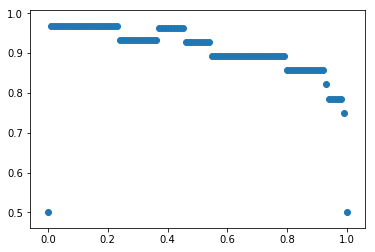

In [189]:
plt.scatter(np.array([0.01*l for l in range(101)]), np.array([roc_auc_score(y_test,get_pred(y_p_2t,0.01*l)) for l in range(101)]))

In [137]:
#  Логистическая регрессия с обучением RMSProp

In [190]:
def log_reg_rmsp(X,y, alpha=0.001, era=1000000, eps=0.0000001, gamma=0.9):
    '''
       получаем коэффициенты для регрессии
    '''
    j = 0
    e = 0.00000001
    m = len(X[0])+1
    Egt = np.zeros(m)
    teta_old = np.zeros(m)
    teta = np.ones(m)
    while (np.sum(np.abs(teta-teta_old) > eps)>0) and (era > j):
        teta_old = teta.copy()
        gt = y-(1/(1+np.exp(-(np.dot((teta_old[1:]),X.T)+(teta_old[0])))))
        teta[0] = teta_old[0] + alpha*(np.sum(gt)/len(y))/(np.sqrt(Egt[0]+e))
        teta[1:] = teta_old[1:] + alpha*(np.sum(X*(gt.reshape(len(y),1)), axis=0)/len(y))/(np.sqrt(Egt[1:]+e))
        Egt[0]  =gamma*Egt[0] +(1-gamma)*(np.sum(gt)/len(y))**2
        Egt[1:] =gamma*Egt[1:]+(1-gamma)*(np.sum(X*(gt.reshape(len(y),1)), axis=0)/len(y))**2
        if(j%50000 == 0):
            print(j,teta)
        j+=1
    print('Количество эпох:',j-1) 
    return teta

In [191]:
teta = log_reg_rmsp(X, y)
y_p_3 = 1/(1+np.exp(-(np.sum(X*teta[1:],axis=1)+teta[0])))
y_c_3 = get_pred(y_p_3)

0 [ -3.9999971  -28.67998439 -12.84999284 -20.29998915  -5.62999663]
50000 [-13.86960134  -3.93106256  -5.44533895   7.05763543  11.51051579]
100000 [-40.81253205  -2.48602105  -6.51519164   9.17609933  17.74015963]
150000 [-42.56722962  -2.46737595  -6.67405903   9.41931695  18.26998264]
200000 [-42.65082369  -2.46541555  -6.68471118   9.43158468  18.29459681]
250000 [-42.63240178  -2.46468508  -6.6829154    9.42870997  18.28636295]
300000 [-42.65623422  -2.46429979  -6.68283998   9.43206354  18.28919459]
Количество эпох: 311256


In [193]:
roc_auc_score(y,y_c_3)

0.98

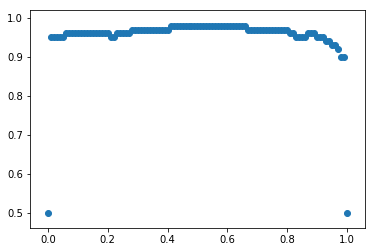

In [194]:
plt.scatter(np.array([0.01*l for l in range(101)]), np.array([roc_auc_score(y,get_pred(y_p_3,0.01*l)) for l in range(101)]))

In [195]:
#  третья модель сошлась значительно быстрей 
#  к конечным значениям близко подошла примерно в 8 раз быстрей, чем первые две 
#  и еще модель более уверено разделяет классы, чем первые две

In [196]:
# теперь проверим для тестовой выборке

In [197]:
teta = log_reg_rmsp(X_train, y_train)
y_p_3t = 1/(1+np.exp(-(np.sum(X_test*teta[1:],axis=1)+teta[0])))
y_c_3t = get_pred(y_p_3t)
print('roc_auc:',roc_auc_score(y_test,y_c_3t))

0 [ -3.85714083 -28.14284589 -12.58570912 -19.97142058  -5.62856891]
50000 [-14.66970934  -2.89006468  -6.60148615   6.41700296  11.61929437]
100000 [-58.81038042  -1.47621015 -14.45413037  10.22273233  34.11943683]
150000 [-96.56239652  -1.1577734  -22.38299566  14.65898199  55.36506847]
200000 [-127.57038422   -0.93403569  -28.96138061   18.26003315   73.23261706]
250000 [-152.94614111   -0.67442161  -34.20741727   20.98807054   88.05580885]
300000 [-173.80228367   -0.37569333  -38.38829409   23.02564995  100.35443373]
350000 [-1.91145627e+02 -9.14038196e-02 -4.18269787e+01  2.46404029e+01
  1.10637385e+02]
400000 [-2.05876420e+02  1.59525858e-01 -4.47190773e+01  2.59840659e+01
  1.19380435e+02]
450000 [-218.5994478     0.37720525  -47.19390061   27.13317074  126.92699517]
500000 [-229.71267223    0.56429477  -49.3351109    28.13275909  133.50780075]
550000 [-239.55357291    0.72530205  -51.22473107   29.02278485  139.32658527]
600000 [-248.37404895    0.8654698   -52.91374289   29.8

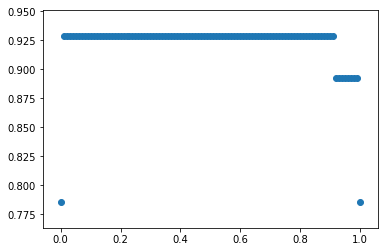

In [198]:
plt.scatter(np.array([0.01*l for l in range(101)]), np.array([roc_auc_score(y_test,get_pred(y_p_3t,0.01*l)) for l in range(101)]))